In [1]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
from sage_data_client import query

In [19]:
df = query(start="-5m", filter={"name": "env.temperature", "sensor": "bme280"})

In [20]:
chicago_nodes = [
    "W078",
    "W024",
    "W07F",
    "W07E",
    "W080",
    "W015",
    "W07D",
    "W079",
    "W07A",
    "W026",
    "W07B",
    "W02C"
]

In [21]:
mask = df["meta.vsn"].apply(lambda x: x in chicago_nodes)
df1 = df[mask]

In [22]:
df1.groupby("meta.vsn")["value"].mean()

meta.vsn
W024    36.453
W026    35.021
W079    39.353
W07A    31.465
W07E    34.620
W080    33.392
Name: value, dtype: float64

In [61]:
df = query(start="-10m", filter={"name": "env.smoke.tile_probs"})

In [57]:
a = df[df["meta.vsn"] == "V040"].iloc[0]

In [67]:
import json
import numpy as np
b = np.array(json.loads(a.value))

In [127]:
def get_smoke_data_from_sage(df):
    time_window = "-1h"
    vsns = '|'.join(df["vsn"].to_list())
    df = query(start=time_window, filter=
        {
            "name": "env.smoke.tile_probs",
            "vsn": vsns,
        },
    )
    for vsn, _df in df.groupby("meta.vsn"):
        detected = False
        for _, r in _df.iterrows():
            v = np.array(json.loads(r.value))
            smoke = np.argwhere(v.squeeze() > 0.45)
            if len(smoke) >= 1:
                print(f'{r["meta.vsn"]} detected smoke. timestamp {r["timestamp"]} at {smoke}th tiles')
                detected = True
        if not detected:
            print(f'no smoke detected on {vsn} within {time_window} ')

In [128]:
get_smoke_data_from_sage(pd.DataFrame({"vsn": ["V040", "V042"]}))

no smoke detected on V040 within -1h 
V042 detected smoke. timestamp 2023-06-14 16:50:12.145629508+00:00 at [[12]
 [39]]th tiles
V042 detected smoke. timestamp 2023-06-14 17:00:12.429250688+00:00 at [[39]]th tiles


In [114]:
g = df.groupby("meta.vsn")

In [115]:
for df in g.groups():
    print(df)

TypeError: 'PrettyDict' object is not callable

In [261]:
df

,goal_id,k3s_job_name,k3s_job_status,k3s_pod_name,k3s_pod_node_name,k3s_pod_status,plugin_args,plugin_image,plugin_name,plugin_selector,plugin_task,timestamp,node,vsn,event,reason,end_state,completed_at,failed_at,plugin_status_by_scheduler
608,6eccb406-0f5d-4977-5e05-b8e105a57dc6,cloud-cover-top,NaN,NaN,NaN,NaN,-stream top,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,"{""resource.gpu"":""true""}",cloud-cover-top,2022-11-03 20:40:33.872722197+00:00,000048b02d15bc73,W024,sys.scheduler.status.plugin.launched,NaN,unknown,NaT,NaN,NaN
609,6eccb406-0f5d-4977-5e05-b8e105a57dc6,sound-event-detection,NaN,NaN,NaN,NaN,--DURATION_S 5 --PUBLISH,registry.sagecontinuum.org/dariodematties/soun...,sound-event-detection,null,sound-event-detection,2022-11-03 20:40:33.909104771+00:00,000048b02d15bc73,W024,sys.scheduler.status.plugin.launched,NaN,unknown,NaT,NaN,NaN
610,4a0dff2f-010e-4b1a-7b26-23f3f6056159,surfacewater-classifier,NaN,surfacewater-classifier-z5tds,000048b02d15bc73.ws-nxcore,Pending,-stream bottom -model /app/model.pth -sampling...,registry.sagecontinuum.org/seonghapark/surface...,surfacewater-classifier,"{""resource.gpu"":""true""}",surfacewater-classifier,2022-11-03 20:45:13.689271762+00:00,000048b02d15bc73,W024,sys.scheduler.status.plugin.launched,NaN,completed,2022-11-03 20:48:58.470103750+00:00,NaN,NaN
611,6eccb406-0f5d-4977-5e05-b8e105a57dc6,object-counter-bottom,NaN,object-counter-bottom-8w6gr,000048b02d15bc73.ws-nxcore,Pending,-stream bottom -all-objects,registry.sagecontinuum.org/yonghokim/object-co...,object-counter-bottom,"{""resource.gpu"":""true""}",object-counter-bottom,2022-11-03 20:45:13.785838626+00:00,000048b02d15bc73,W024,sys.scheduler.status.plugin.launched,NaN,completed,2022-11-03 20:49:08.486329415+00:00,NaN,NaN
612,6eccb406-0f5d-4977-5e05-b8e105a57dc6,cloud-cover-top,NaN,cloud-cover-top-5vddd,000048b02d15bc73.ws-nxcore,Pending,-stream top,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,"{""resource.gpu"":""true""}",cloud-cover-top,2022-11-03 20:50:05.579357842+00:00,000048b02d15bc73,W024,sys.scheduler.status.plugin.launched,NaN,completed,2022-11-03 21:01:24.641095519+00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,8574933f-3e2f-419e-5776-1b2fcbeaa6fe,cloud-cover-top,NaN,cloud-cover-top-l5gg4,000048b02d05a1c7.ws-nxcore,Pending,-stream top,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,"{""resource.gpu"":""true""}",cloud-cover-top,2022-11-04 20:30:05.520280365+00:00,000048b02d05a1c7,W026,sys.scheduler.status.plugin.launched,NaN,completed,2022-11-04 20:31:22.923215173+00:00,NaT,Running
1344,8574933f-3e2f-419e-5776-1b2fcbeaa6fe,cloud-motion-top,NaN,cloud-motion-top-r7zwz,000048b02d05a1c7.ws-nxcore,Pending,--input top,registry.sagecontinuum.org/bhupendraraut/cloud...,cloud-motion-top,"{""resource.gpu"":""true""}",cloud-motion-top,2022-11-04 20:31:23.132265310+00:00,000048b02d05a1c7,W026,sys.scheduler.status.plugin.launched,NaN,failed,NaT,2022-11-04 20:31:29.992243934+00:00,Running
1345,8574933f-3e2f-419e-5776-1b2fcbeaa6fe,object-counter-bottom,NaN,object-counter-bottom-64fpw,000048b02d05a1c7.ws-nxcore,Pending,-stream bottom -all-objects,registry.sagecontinuum.org/yonghokim/object-co...,object-counter-bottom,"{""resource.gpu"":""true""}",object-counter-bottom,2022-11-04 20:31:30.108171137+00:00,000048b02d05a1c7,W026,sys.scheduler.status.plugin.launched,NaN,completed,2022-11-04 20:32:07.460027798+00:00,NaT,Running
1346,8574933f-3e2f-419e-5776-1b2fcbeaa6fe,sound-event-detection,NaN,sound-event-detection-pt4hf,000048b02d05a1c7.ws-nxcore,Pending,--DURATION_S 5 --PUBLISH,registry.sagecontinuum.org/dariodematties/soun...,sound-event-detection,null,sound-event-detection,2022-11-04 20:32:07.624034950+00:00,000048b02d05a1c7,W026,sys.scheduler.status.plugin.launched,NaN,completed,2022-11-04 20:32:27.523305892+00:00,NaT,Running


In [415]:
grouped = df.groupby(by=["plugin_name", "end_state", "vsn"])

In [384]:
grouped.size().unstack(fill_value=0).unstack(fill_value=0)

end_state         completed                                       \
plugin_name cloud-cover-top cloud-motion-top imagesampler-bottom   
vsn                                                                
W024                     82                0                  18   
W026                    132                0                  25   

end_state                                                                 \
plugin_name imagesampler-top object-counter-bottom sound-event-detection   
vsn                                                                        
W024                      19                   127                    95   
W026                      23                   286                   139   

end_state                                    failed                   \
plugin_name surfacewater-classifier cloud-cover-top cloud-motion-top   
vsn                                                                    
W024                            145               1               63   
W026                              0               4               47   

end_state                        ...                        \
plugin_name imagesampler-bottom  ... object-counter-bottom   
vsn                              ...                         
W024                          0  ...                     1   
W026                          0  ...                     2   

end_state                                                         unknown  \
plugin_name sound-event-detection surfacewater-classifier cloud-cover-top   
vsn                                                                         
W024                            3                       0              11   
W026                            0                       0               7   

end_state                                                          \
plugin_name cloud-motion-top imagesampler-bottom imagesampler-top   
vsn                                                                 
W024                       3                   3                3   
W026                       1                   0                1   

end_state                                                \
plugin_name object-counter-bottom sound-event-detection   
vsn                                                       
W024                           10                    14   
W026                            2                     4   

end_state                            
plugin_name surfacewater-classifier  
vsn                                  
W024                              4  
W026                              0  

[2 rows x 21 columns]

In [394]:
a = grouped.size()

In [396]:
stat_w024 = a.filter(like="W024")
stat_w026 = a.filter(like="W026")

In [401]:
stat_w024.unstack(fill_value=0).reset_index()

end_state,vsn,plugin_name,completed,failed,unknown
0,W024,cloud-cover-top,82,1,11
1,W024,cloud-motion-top,0,63,3
2,W024,imagesampler-bottom,18,0,3
3,W024,imagesampler-top,19,0,3
4,W024,object-counter-bottom,127,1,10
5,W024,sound-event-detection,95,3,14
6,W024,surfacewater-classifier,145,0,4


<AxesSubplot: xlabel='plugin_name'>

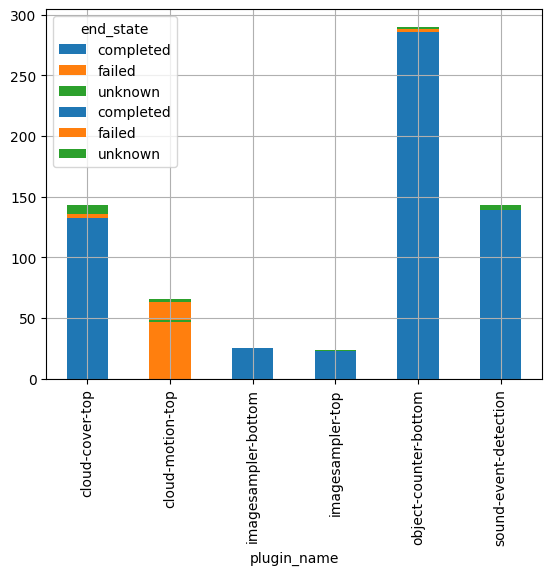

In [412]:
fix, ax = plt.subplots()
stat_w024.unstack(fill_value=0).reset_index().plot(kind='bar', x="plugin_name", grid=True, stacked=True, ax=ax)
stat_w026.unstack(fill_value=0).reset_index().plot(kind='bar', x="plugin_name", grid=True, stacked=True, ax=ax)

<AxesSubplot: xlabel='plugin_name,end_state'>

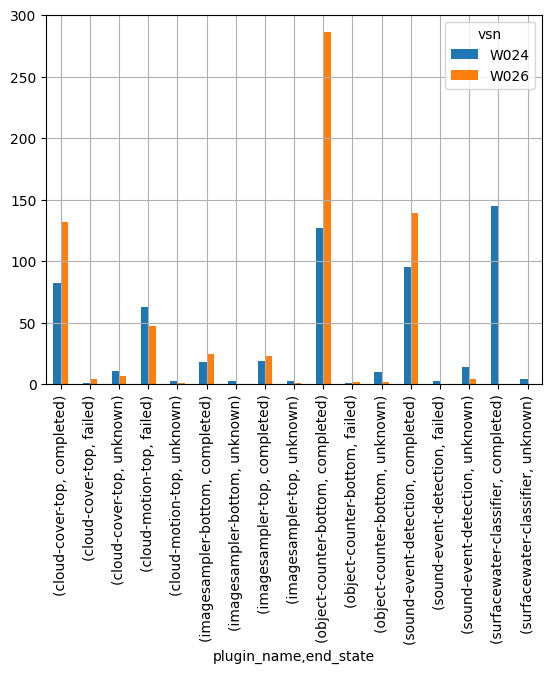

In [420]:
# fix, ax = plt.subplots()
grouped.size().unstack(fill_value=0).plot(kind='bar',grid=True)

In [421]:
grouped.size().unstack(fill_value=0)

vsn                                W024  W026
plugin_name             end_state            
cloud-cover-top         completed    82   132
                        failed        1     4
                        unknown      11     7
cloud-motion-top        failed       63    47
                        unknown       3     1
imagesampler-bottom     completed    18    25
                        unknown       3     0
imagesampler-top        completed    19    23
                        unknown       3     1
object-counter-bottom   completed   127   286
                        failed        1     2
                        unknown      10     2
sound-event-detection   completed    95   139
                        failed        3     0
                        unknown      14     4
surfacewater-classifier completed   145     0
                        unknown       4     0

In [6]:
import cv2
import matplotlib.pyplot as plt
cap = cv2.VideoCapture("/Users/yonghokim/Downloads/test.mp4")

In [7]:
img = cap.read()

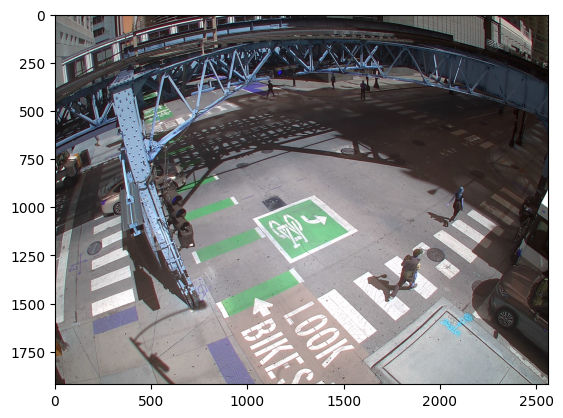

: 

In [9]:
plt.imshow(img[1])